In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold,GridSearchCV


In [8]:
pd.set_option('display.max_rows', None)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:

data_2021= pd.read_csv("/content/drive/My Drive/Colab Notebooks/players_21.csv")
data_2022 = pd.read_csv("/content/drive/My Drive/Colab Notebooks//players_22.csv", dtype={25: 'str', 108: 'str'})

In [12]:
# Display 2021 data
data_2021.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [13]:
# Display 2022 data
data_2022.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [14]:
to_drop =['sofifa_id', 'player_url', 'short_name', 'long_name','dob',
          'club_team_id','nationality_id','nation_team_id',
          'real_face','player_tags','player_traits',
          'club_logo_url','club_flag_url', 'nation_logo_url',
          'nation_flag_url','player_face_url',"nation_position","club_loaned_from"]

In [15]:
data_2021.drop(to_drop, axis = 1 , inplace =True )
data_2022.drop(to_drop, axis = 1 , inplace =True )

In [16]:
data_2021.dtypes

player_positions                object
overall                          int64
potential                        int64
value_eur                      float64
wage_eur                       float64
age                              int64
height_cm                        int64
weight_kg                        int64
club_name                       object
league_name                     object
league_level                   float64
club_position                   object
club_jersey_number             float64
club_joined                     object
club_contract_valid_until      float64
nationality_name                object
nation_jersey_number           float64
preferred_foot                  object
weak_foot                        int64
skill_moves                      int64
international_reputation         int64
work_rate                       object
body_type                       object
release_clause_eur             float64
pace                           float64
shooting                 

In [17]:
# extracting first number from the string
def extract_first_number(s):
    s = str(s)
    if "+" in s:
      return int(s.split('+')[0].strip())
    else:
      return int(s.split('-')[0].strip())


cols_to_modify = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
                  'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
                  'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

for col in cols_to_modify:
    data_2021[ col] = data_2021[col].apply( extract_first_number)

for col in cols_to_modify:
    data_2022[ col] = data_2022[col].apply( extract_first_number)

In [18]:
# # Group by the last letter of the position columns using mean
# mean_by_position = data_2021[cols_to_modify].groupby(data_2021[cols_to_modify].columns.str[-1], axis=1).mean()

# data_2021 = data_2021.drop(columns=cols_to_modify)
# data_2021 = pd.concat([data_2021, mean_by_position], axis=1)


# mean_by_position2 = data_2022[cols_to_modify].groupby(data_2022[cols_to_modify].columns.str[-1], axis=1).mean()

# data_2022 = data_2022.drop(columns=cols_to_modify)
# data_2022 = pd.concat([data_2022, mean_by_position], axis=1)



In [19]:


# Defining position groups
striker_positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw']
midfielder_positions = ['lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb']
defender_positions = ['lb', 'lcb', 'cb', 'rcb', 'rb']
goalkeeper_position = ['gk']

# Computing means and creating new columns
data_2021['Striker_Avg'] = data_2021[striker_positions].mean(axis=1)
data_2021['Midfielder_Avg'] = data_2021[midfielder_positions].mean(axis=1)
data_2021['Defender_Avg'] = data_2021[defender_positions].mean(axis=1)
data_2021['Goalkeeper'] = data_2021[goalkeeper_position]  # Directly assigning as there's only one column for goalkeepers



data_2022['Striker_Avg'] = data_2022[striker_positions].mean(axis=1)
data_2022['Midfielder_Avg'] = data_2021[midfielder_positions].mean(axis=1)
data_2021['Defender_Avg'] = data_2022[defender_positions].mean(axis=1)
data_2022['Goalkeeper'] = data_2022[goalkeeper_position]  # Directly assigning as there's only one column for goalkeepers

# Drop original columns
data_2021 = data_2022.drop(striker_positions + midfielder_positions + defender_positions + goalkeeper_position, axis=1)
data_2022 = data_2022.drop(striker_positions + midfielder_positions + defender_positions + goalkeeper_position, axis=1)


In [20]:
data_2021.dtypes

player_positions                object
overall                          int64
potential                        int64
value_eur                      float64
wage_eur                       float64
age                              int64
height_cm                        int64
weight_kg                        int64
club_name                       object
league_name                     object
league_level                   float64
club_position                   object
club_jersey_number             float64
club_joined                     object
club_contract_valid_until      float64
nationality_name                object
nation_jersey_number           float64
preferred_foot                  object
weak_foot                        int64
skill_moves                      int64
international_reputation         int64
work_rate                       object
body_type                       object
release_clause_eur             float64
pace                           float64
shooting                 

In [21]:
import numpy as np

# 2021 categorical and numeric data
categorical_features_2021 = data_2021.select_dtypes(exclude=[np.number])
numeric_features_2021 = data_2021.select_dtypes(include=[np.number])


# 2022 categorical and numeric data
categorical_features_2022 = data_2022.select_dtypes(exclude=[np.number])
numeric_features_2022 = data_2022.select_dtypes(include=[np.number])


In [22]:
categorical_features_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_positions  19239 non-null  object
 1   club_name         19178 non-null  object
 2   league_name       19178 non-null  object
 3   club_position     19178 non-null  object
 4   club_joined       18076 non-null  object
 5   nationality_name  19239 non-null  object
 6   preferred_foot    19239 non-null  object
 7   work_rate         19239 non-null  object
 8   body_type         19239 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


Imputation and Scaling of numerical values


In [23]:
categorical_features_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_positions  19239 non-null  object
 1   club_name         19178 non-null  object
 2   league_name       19178 non-null  object
 3   club_position     19178 non-null  object
 4   club_joined       18076 non-null  object
 5   nationality_name  19239 non-null  object
 6   preferred_foot    19239 non-null  object
 7   work_rate         19239 non-null  object
 8   body_type         19239 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [24]:
numeric_imp=SimpleImputer(strategy='mean')

In [25]:
numeric_imp.fit(numeric_features_2021)

imputed_data = numeric_imp.transform(numeric_features_2021)
numeric_features_2021 =pd.DataFrame(imputed_data, columns=numeric_features_2021.columns)


imputed_data2 = numeric_imp.transform(numeric_features_2022)
numeric_features_2022 =pd.DataFrame(imputed_data2, columns=numeric_features_2021.columns)


In [26]:
y_train= numeric_features_2021['overall']
numeric_features_2021.drop("overall", axis = 1 , inplace =True)

y_test = numeric_features_2022['overall']
numeric_features_2022.drop("overall", axis = 1 , inplace =True)

Encoding and Imputing Categorical variables

In [27]:
encoders_2021 = {}  # to store our encoders for potential use later
encoders_2022 = {}
# Encoding Categorical features
imputer = SimpleImputer(strategy='most_frequent')
categorical_imputed_21 = imputer.fit_transform(categorical_features_2021)
categorical_imputed_22= imputer.transform(categorical_features_2022)

categorical_features_2021 = pd.DataFrame(categorical_imputed_21,columns = categorical_features_2021.columns)
categorical_features_2022 = pd.DataFrame(categorical_imputed_22,columns = categorical_features_2022.columns)


imputer = SimpleImputer(strategy='most_frequent')

for column in categorical_features_2021.columns:
    encoder = LabelEncoder()
    categorical_features_2021[column] = encoder.fit_transform(categorical_features_2021[column])
    encoders_2021[column] = encoder  # store the encoder

for column in categorical_features_2022.columns:
    encoder = LabelEncoder()
    categorical_features_2022[column] = encoder.fit_transform(categorical_features_2022[column])
    encoders_2022[column] = encoder  # store the encoder



In [28]:
temp_df_2021 = pd.concat([numeric_features_2021,categorical_features_2021, y_train], axis = 1)

In [29]:
temp_df_2022 = pd.concat([numeric_features_2022,categorical_features_2022,y_test], axis = 1)

**Correlation Analysis (EDA)**

In [30]:
correlation_matrix_2021 = temp_df_2021.corr()

In [31]:
highest_correlation = []

correlation_matrix_2021 = temp_df_2021.corr()
for (i,x) in correlation_matrix_2021["overall"].items():
  if x > 0.45:
    highest_correlation.append(i)



In [32]:
highest_correlation

['potential',
 'value_eur',
 'wage_eur',
 'age',
 'international_reputation',
 'release_clause_eur',
 'shooting',
 'passing',
 'dribbling',
 'physic',
 'attacking_short_passing',
 'skill_long_passing',
 'skill_ball_control',
 'movement_reactions',
 'power_shot_power',
 'mentality_vision',
 'mentality_composure',
 'Striker_Avg',
 'Midfielder_Avg',
 'overall']

In [33]:
train_data = temp_df_2021.copy()[highest_correlation]
df_2022 = temp_df_2022.copy()[highest_correlation]

In [34]:
train_data.dtypes

potential                   float64
value_eur                   float64
wage_eur                    float64
age                         float64
international_reputation    float64
release_clause_eur          float64
shooting                    float64
passing                     float64
dribbling                   float64
physic                      float64
attacking_short_passing     float64
skill_long_passing          float64
skill_ball_control          float64
movement_reactions          float64
power_shot_power            float64
mentality_vision            float64
mentality_composure         float64
Striker_Avg                 float64
Midfielder_Avg              float64
overall                     float64
dtype: object

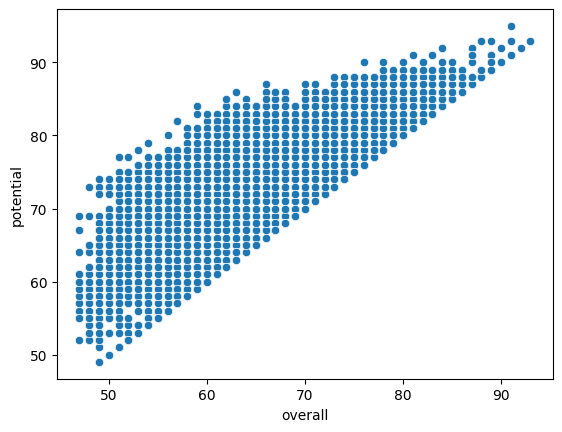

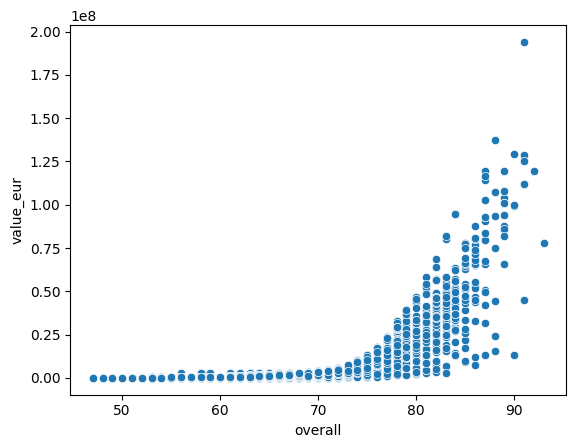

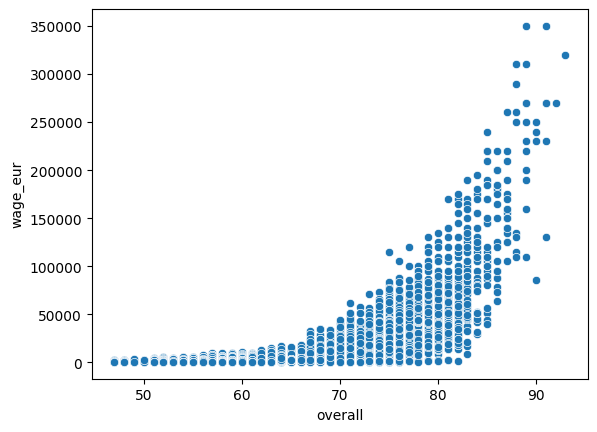

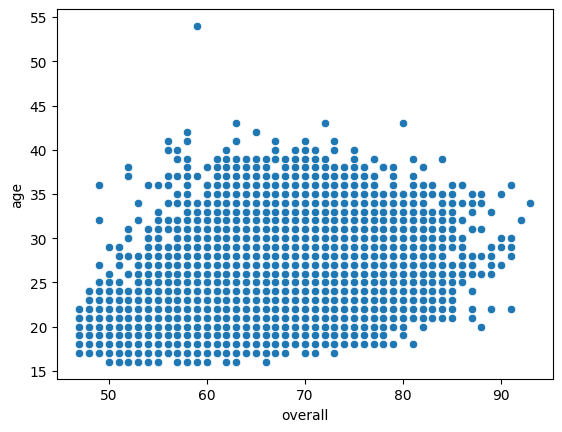

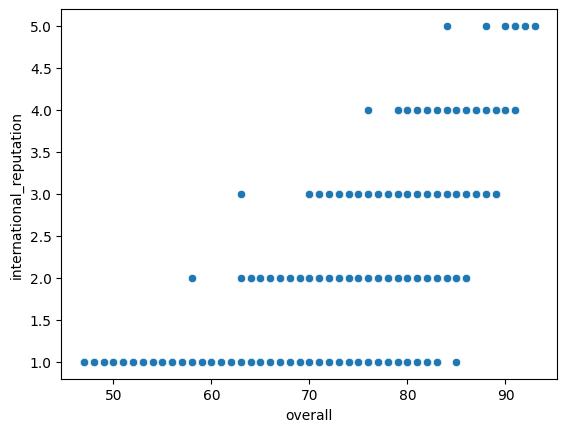

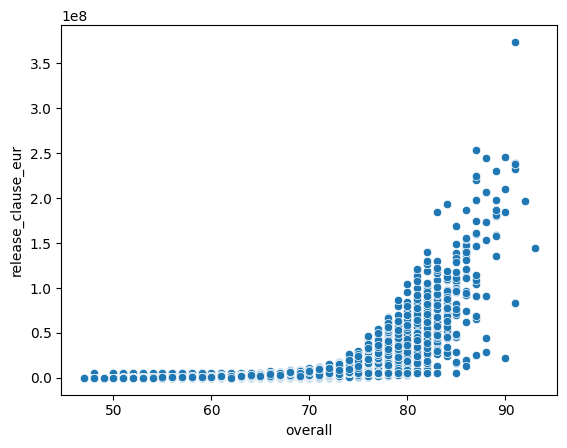

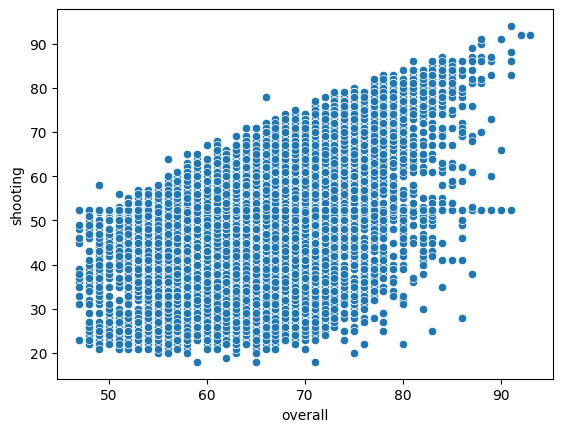

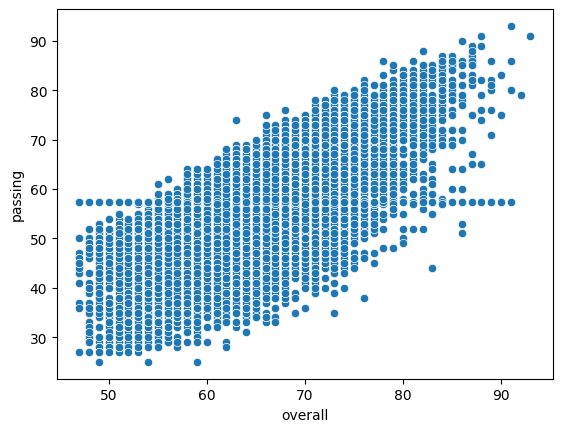

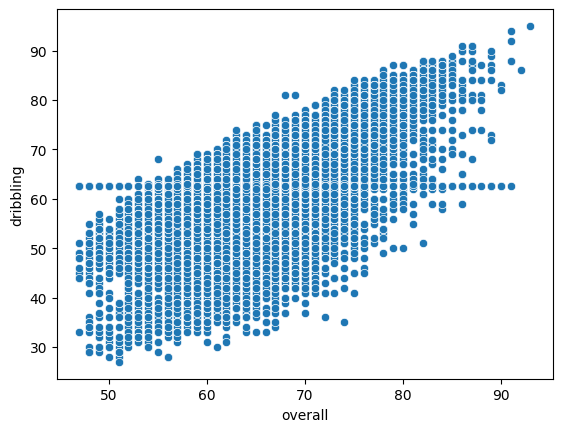

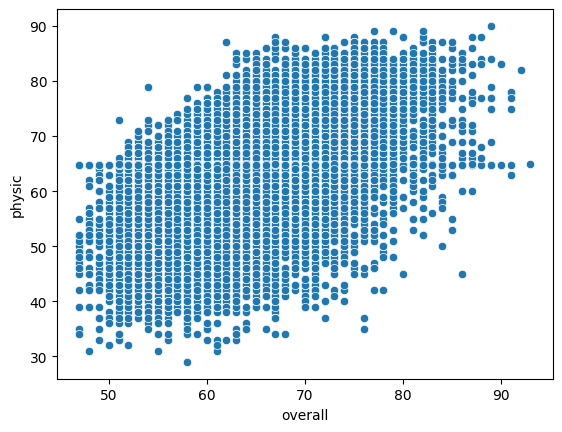

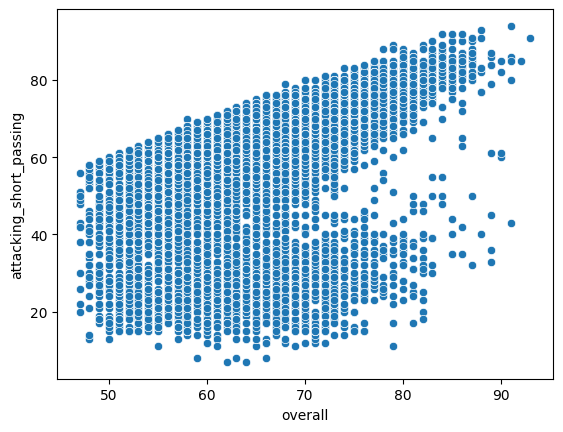

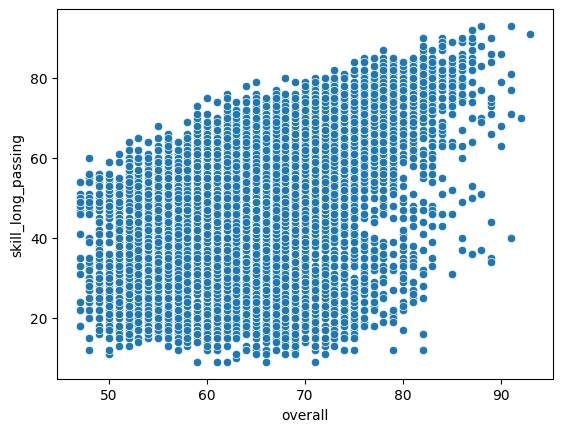

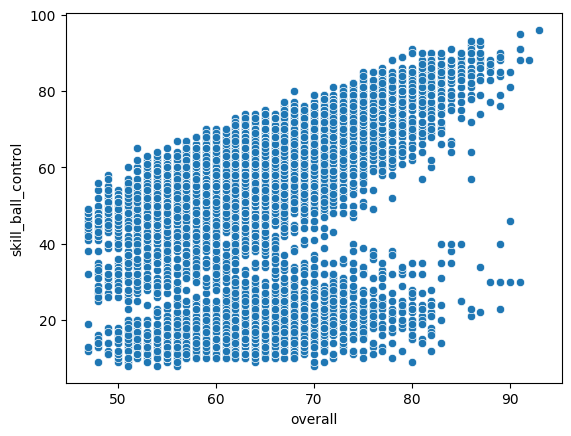

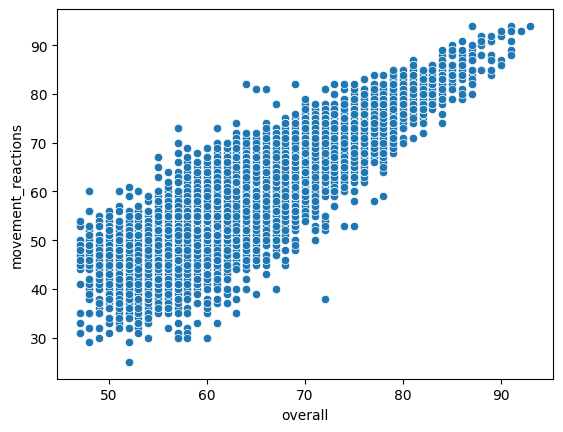

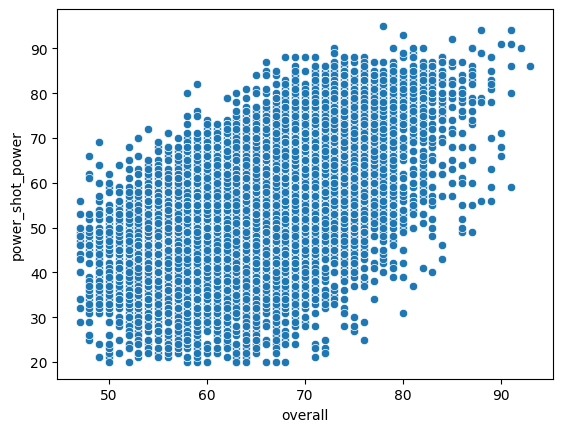

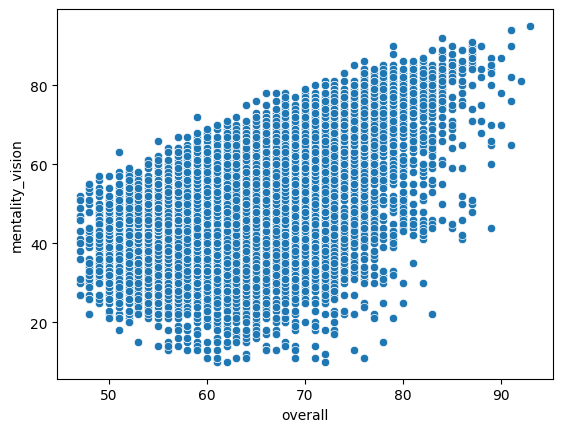

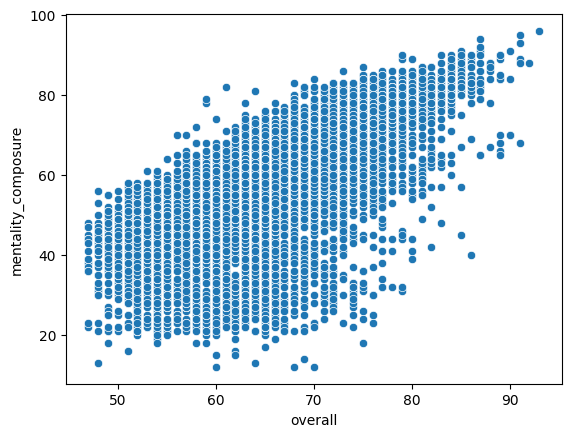

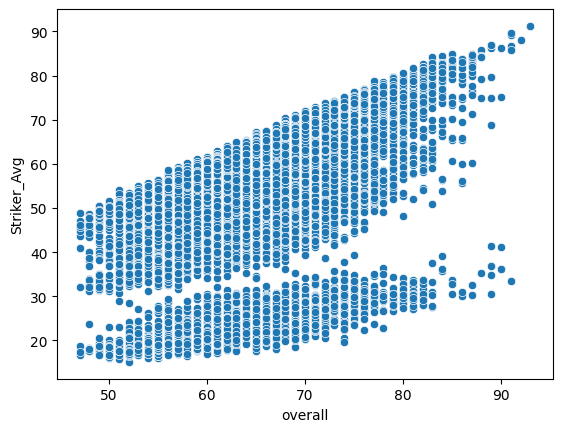

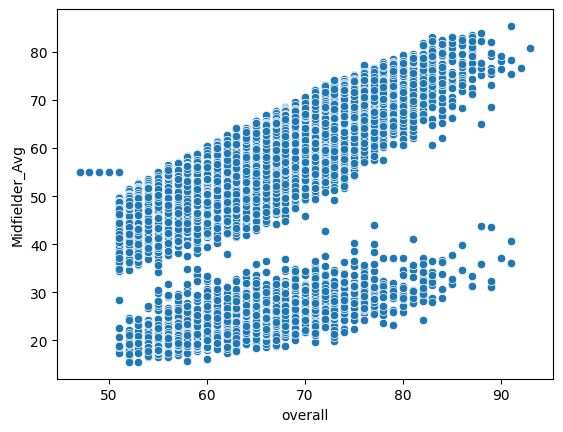

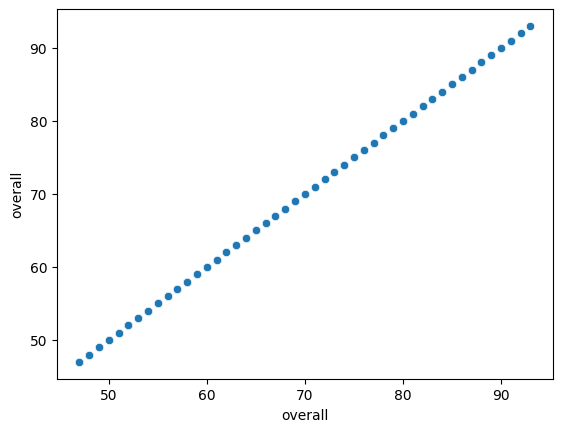

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


for i in train_data.columns:
  sns.scatterplot(data=train_data, x='overall', y = i)
  plt.show()



In [36]:
# Training data
y = train_data['overall']
train_data.drop("overall", axis = 1 , inplace =True)


# 2022 data
y_test_2022 = df_2022['overall']
df_2022.drop("overall", axis = 1 , inplace =True)

In [37]:
#Scaling numeric values
scaler = StandardScaler()
scaler.fit(train_data)

scaled_data_2021 = scaler.transform(train_data)

scaled_data_2022 = scaler.transform(df_2022)


train_data = pd.DataFrame(scaled_data_2021,columns = train_data.columns)
df_2022 = pd.DataFrame(scaled_data_2022,columns = df_2022.columns)

In [38]:
X = train_data

In [39]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=42)

**Random Forest Regressor**

In [40]:
rf = RandomForestRegressor(n_estimators=120, random_state=42)
rf.fit(Xtrain, Ytrain)

RandomForestRegressor(n_estimators=120, random_state=42)

In [41]:
y_pred = rf.predict(Xtest)

mse = mean_absolute_error (y_pred, Ytest)
print(f"Mean Absolute Error: {mse}")


Mean Absolute Error: 0.282012300762301


**Gradient Booster**


In [42]:
gbrt = GradientBoostingRegressor(n_estimators=120, learning_rate=0.01)
gbrt.fit(Xtrain, Ytrain)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=120)

In [43]:
y_pred=gbrt.predict(Xtest)



In [44]:
mse = mean_absolute_error (y_pred, Ytest)
print(f"Mean Absolute Error: {mse}")


Mean Absolute Error: 2.09052664025186


**GX Booster**

In [45]:
gbr = XGBRegressor(n_estimators=120, learning_rate=0.01)
gbr.fit(Xtrain, Ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=120, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred=gbr.predict(Xtest)
mse = mean_absolute_error (y_pred, Ytest)
print(f"Mean Absolute Error: {mse}")


Mean Absolute Error: 1.7284590290886448




**Cross Validation for random forest regressor**



In [82]:
cv=KFold(n_splits=3)

PARAMETERS = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [3, 5, 10, 20],
}

In [83]:
rfr = RandomForestRegressor()
model_rfr = GridSearchCV(rfr,param_grid=PARAMETERS,cv=cv,scoring="neg_mean_absolute_error")
model_rfr.fit(Xtrain,Ytrain)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='neg_mean_absolute_error')

In [85]:
y_pred=model_rfr.predict(Xtest)

In [86]:
mse = mean_absolute_error (y_pred, Ytest)
print(f"Mean Absolute Error: {mse}")

Mean Absolute Error: 0.28057343126790696


In [84]:
model_rfr.best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=500)

**Cross Validation for GradientBoostingRegressor**

In [56]:
cv2=KFold(n_splits=3)
PARAMETERS = {
    'n_estimators': [10, 50, 100, 120 ,200, 500, 1000],
    'max_depth': [3, 5, 7, 10, 20],
    "learning_rate" : [0.03, 0.1, 0.3,0.01]
}

In [88]:
gbrt = GradientBoostingRegressor()

In [89]:
model_gbrt = GridSearchCV(gbrt,param_grid=PARAMETERS,cv=cv,scoring="neg_mean_absolute_error")
model_gbrt.fit(Xtrain,Ytrain)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.03, 0.1, 0.3, 0.01],
                         'max_depth': [3, 5, 7, 10, 20],
                         'n_estimators': [10, 50, 100, 120, 200, 500, 1000]},
             scoring='neg_mean_absolute_error')

In [90]:
y_pred=model_gbrt.predict(Xtest)

mse = mean_absolute_error (y_pred, Ytest)
print(f"Mean Absolute Error: {mse}")

Mean Absolute Error: 0.26414272474313627


In [91]:
model_gbrt.best_estimator_

GradientBoostingRegressor(learning_rate=0.03, max_depth=10, n_estimators=1000)

**Cross Validation for XGBRegressor**

In [53]:
cv3=KFold(n_splits=3)

In [54]:
xgbr = XGBRegressor()

In [58]:
model_xgbr = GridSearchCV(xgbr,param_grid=PARAMETERS,cv=cv3,scoring="neg_mean_absolute_error")
model_xgbr.fit(Xtrain,Ytrain)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    i...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.03, 0.1, 0.3, 0.01],
                         'max_depth': [3, 5, 7, 10, 20],
                         'n_estimators': [10, 50, 100, 120, 200, 500, 1000]},
             scoring='neg_mean_absolute_error')

In [95]:
y_pred=model_xgbr.predict(Xtest)

mse = mean_absolute_error (y_pred, Ytest)
print(f"Mean Absolute Error: {mse}")

Mean Absolute Error: 0.26289840944095855


In [59]:
model_xgbr.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Best fine Tuned Model**

In [47]:
gbr_fine_tuned = GradientBoostingRegressor(learning_rate=0.03, max_depth=10, n_estimators=1000)

In [48]:
gbr_fine_tuned.fit(Xtrain, Ytrain)

#learning_rate=0.03, max_depth=10, n_estimators=1000

GradientBoostingRegressor(learning_rate=0.03, max_depth=10, n_estimators=1000)

In [49]:
y_pred = gbr_fine_tuned.predict(Xtest)

mse = mean_absolute_error (y_pred, Ytest)
print(f"Mean Absolute Error: {mse}")

Mean Absolute Error: 0.26435019020385353


**Testing on 2022**

In [50]:
y_pred=gbr_fine_tuned.predict(df_2022)

mse = mean_absolute_error (y_pred, y_test_2022)
print(f"Mean Absolute Error: {mse}")

Mean Absolute Error: 0.062107177410332344


**Pickeling best model**

In [51]:
model_data = {
    "model" : gbr_fine_tuned,
    "scaler" : scaler
}

In [60]:
import pickle

# Save to file
with open("fifa_ml.pkl", "wb") as content:
    pickle.dump(model_data, content)




In [ ]:
# !pip install --upgrade scikit-learn
